# Interactive Barchart Practice

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st

np.random.seed(12345)

# np.random.normal(mean,standard_deviation,sample_size)
df = pd.DataFrame([np.random.normal(33500,150000,3650), 
                   np.random.normal(41000,90000,3650), 
                   np.random.normal(41000,120000,3650), 
                   np.random.normal(48000,55000,3650)], 
                  index=[1992,1993,1994,1995])
#print(df)
# print(df.T.describe())
# for index, row in df.iterrows():
#     print(row)
# print(type(pd.Series(np.random.normal(33500,150000,3650))))

In [3]:
#this for confidence interval

df['i_min'], df['i_max']=st.t.interval(0.95, len(df.count(axis=1))-1, loc=df.mean(axis=1), scale=df.sem(axis=1))
df['yerr']=(df['i_max'].abs() - df['i_min'].abs() )

df['mean']=df.mean(axis=1)
df['std']=df.std(axis=1)

print(df[['mean', 'i_min', 'i_max', 'yerr', 'std']])

              mean         i_min         i_max          yerr            std
1992  34478.980316  26557.721565  42410.439648  15852.718084  150391.200458
1993  39967.284368  35310.744938  44640.602236   9329.857297   88511.541178
1994  37558.876374  31227.840311  43903.539589  12675.699278  120251.984105
1995  47787.000848  44910.368298  50686.640368   5776.272071   54802.499009


<IPython.core.display.Javascript object>


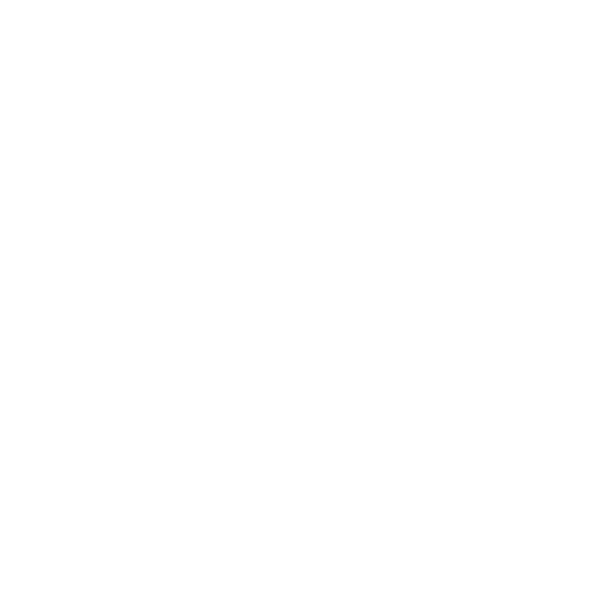

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bl',
 '_df',
 'ax',
 'lx',
 'mouse_move']

In [4]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

cl_max_color='red'
cl_min_color='blue'
cl_neitral_color='grey'

class Cursor(object):
#     _df=None
#     _bl=None
    def __init__(self, ax, data_F, bars):
        self._df=data_F
        self._bl=bars
        self.ax = ax
        self.lx = ax.axhline(linewidth=5, color='y', alpha = 0.5, linestyle='--')

    def mouse_move(self, event):
        if not event.inaxes:
            return
        x, y = event.xdata, event.ydata
        self.lx.set_ydata(y)
        for index, row in self._df.iterrows():
            if row['i_max']<y:
                # set the color of bars based on the position of mouse
                self._bl[self._df.index.get_loc(index)].set_color(cl_min_color)
                continue
            if row['i_min']>y:
                # set the color of bars based on the position of mouse
                self._bl[self._df.index.get_loc(index)].set_color(cl_max_color)
                continue
            # set the color of bars based on the position of mouse
            self._bl[self._df.index.get_loc(index)].set_color(cl_neitral_color)
        plt.draw()

# a barchart will be created by the function below
def plot_base(fix_x, fig_y, fig_title, c_alpha=0.5):
    ax=df['mean'].plot.bar(yerr=df['yerr'], 
                           title =fig_title, 
                           figsize=(fix_x, fig_y), 
                           legend=False,
                           fontsize=10,
                           alpha=c_alpha,
                           width=0.95, 
                           rot=0,
                           position=0,
                           style='-',
                           color=cl_neitral_color)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    majors = [0.5,1.5,2.5, 3.5]
    ax.xaxis.set_major_locator(ticker.FixedLocator(majors))

    plt.tight_layout()
    
    return (ax, ax.get_children()[1:5])

# Assign data with plot_base(x,x,'xxx') to ax
# Also assign children data of the barchart with ax.get_children() to barlist

ax, barlist=plot_base(3, 3, "easy interactive barchart")
# print(ax.get_children()[1:5])

# I defined Cursor class that needs barchart as ax, dataframe as data_F, children data of barchart as bars
# ax is barchart
# df is dataframe I use
# barlist is children data of the barchart
# then, connect plt with cursor.mouse_move
cursor = Cursor(ax, df, barlist)

# print(cursor._df.iterrows())
# <generator object DataFrame.iterrows at 0x1053ff468>
# print(type(cursor._df.iterrows()))
# <class 'generator'>

# for index, row in cursor._df.iterrows():
#     print(index, row['i_max'], row['i_min'])

plt.connect('motion_notify_event', cursor.mouse_move)
dir(cursor)

<IPython.core.display.Javascript object>


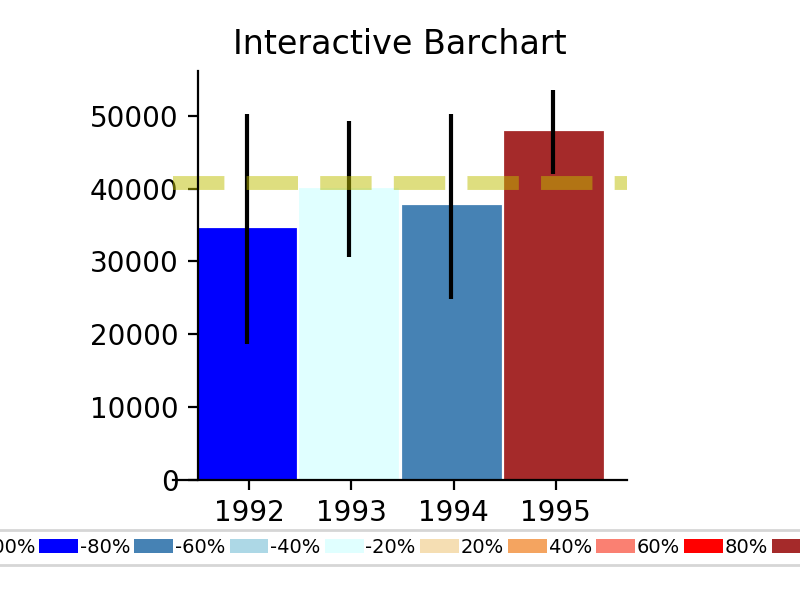

7

In [5]:
#import matplotlib.lines as mlines
%matplotlib notebook
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

from collections import OrderedDict


dct=OrderedDict( [('navy','-100%'), ('blue','-80%'), ('steelblue','-60%'), ('lightblue','-40%'), 
                ('lightcyan','-20%'), ('wheat','20%'), ('sandybrown','40%'), 
                ('salmon','60%'), ('red','80%'), ('brown','100%')] )

com_alpha=1

# class CursorHard inherits the class Cursor below
class CursorHard(Cursor):
    #_colors=list(dct.keys())
    _colors=list(reversed(dct.keys()))
    # print(hcursor._colors) gives ['brown', 'red', 'salmon', 'sandybrown', 'wheat', 'lightcyan', 'lightblue', 'steelblue', 'blue', 'navy']
    _num_bins=8
    def _get_color(self, d_series, val):
        # _get_color function is called in mouse_move function with row and y data
        s=d_series[['i_min', 'i_max']]
        s['val']=val
        # pd.cut function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
        # Use cut when you need to segment and sort data values into bins
        # Here, I segmented s into 8 bins/categories between i_min and i_max
        # Below, s is re-defined with pd.cut to have categorical value (defined by labels below)
        s=pd.cut(s, bins=self._num_bins, labels=list(range(self._num_bins)), include_lowest=False, right=True)
        # by defining labels = list(range(self._num_bins)), all values in Series s are converted into categorical numbers
        return self._colors[s['val']+1]

    def mouse_move(self, event):
        if not event.inaxes:
            return
        x, y = event.xdata, event.ydata
        self.lx.set_ydata(y)
        for index, row in self._df.iterrows():
            if row['i_max']<y:
                # if y of cursor is bigger than i_max, set the bar color as navy
                self._bl[self._df.index.get_loc(index)].set_color(self._colors[-1])
                continue
            if row['i_min']>y:
                # if y of cursor is lower than i_min, set the bar color as brown
                self._bl[self._df.index.get_loc(index)].set_color(self._colors[0])
                continue
            # if y of cursor is between i_max and i_min, call _get_color function with row data and y data and put them into valuables d_series and val
            self._bl[self._df.index.get_loc(index)].set_color(self._get_color(row, y))
        plt.draw()

ax1, barlist1=plot_base(4, 3, 'Interactive Barchart', c_alpha=1) 

bars_leg=[]

for k, v in dct.items():
    p=Rectangle((0, 0), 1, 1, fc=k, label=v)
    bars_leg.append(p)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           handles=bars_leg, ncol=len(bars_leg), columnspacing=0.2, handletextpad=0.1, fontsize=7)

plt.tight_layout()
plt.show()

hcursor = CursorHard(ax1, df, barlist1)
plt.connect('motion_notify_event', hcursor.mouse_move)

# built-in dir() function that gives us a list with the object’s attributes
# dir(hcursor)


In [6]:
# pd.cut practice example

# s = pd.cut(pd.Series(np.random.normal(33500,150000,3650)), 3, labels = list(range(3)))
# print(s)